In [1]:
import numpy as np
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

/usr/local/var/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/var/pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
def r2_calc(x,y):
    sum_1=0
    sum_2=0
    ave = np.sum(x)/len(x)
    for i in range(0,len(x)):
        sum_1 += (x[i]-y[i])**2
        sum_2 += (x[i]-ave)**2
    
    return 1-sum_1/sum_2


def r_calc(test,pred):
    n=len(test)
    ave_test = np.sum(test)/n
    ave_pred = np.sum(pred)/n
    a=0
    b=0
    c=0
    for i in range(0,len(test)):
        a += (test[i] - ave_test)*(pred[i] - ave_pred)
        b += (test[i] - ave_test)**2
        c += (pred[i] - ave_pred)**2
    
    a2 = a/n
    b2 = (b/n)**0.5
    c2 = (c/n)**0.5
    return a2/(b2*c2)

SVR: r2 0.375439, RMSE 0.699756, r 0.761298


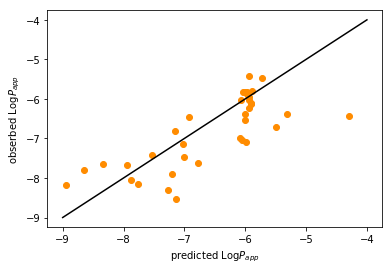

In [4]:
tuned_parameters = [
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['linear']},
    {'C': [2**(-3), 2**(-2), 2**(-1), 1, 2, 2**2, 2**3, 2**4, 2**5, 2**6, 2**7, 2**8, 2**9, 2**10], 'kernel': ['rbf'], 'gamma': [2**(-10), 2**(-9), 2**(-8), 2**(-7), 2**(-6), 2**(-5), 2**(-4), 2**(-3), 2**(-2), 2**(-1), 1 ]},
    ]


train_data = np.loadtxt("furukawa_全体_rank順_名前なし.csv",delimiter=",",dtype=float)
test_data = np.loadtxt("wang_全体_rank順_名前なし.csv",delimiter=",",dtype=float)

train_feature=train_data[:,0:26]
train_label=train_data[:,-1]

test_feature=test_data[:,0:26]
test_label=test_data[:,-1]

std=StandardScaler()
std.fit(train_feature)
train_feature=std.transform(train_feature)
test_feature=std.transform(test_feature)

grid=GridSearchCV(SVR(),tuned_parameters,cv=5,scoring="r2")
grid.fit(train_feature,train_label)


reg=SVR(C=grid.best_params_['C'],kernel="rbf",gamma=grid.best_params_['gamma'])
reg.fit(train_feature,train_label)
pred = reg.predict(test_feature)
r = r_calc(test_label,pred)
r2 = r2_score(test_label,pred)
rmse = (mean_squared_error(test_label,pred))**0.5


x = np.linspace(-9,-4)  
y = x              
plt.plot(x,y,color="black")      

y1 = pred
y2 = test_label
plt.scatter(y1,y2,color="darkorange")

plt.ylabel('obserbed Log$P_{app}$')
plt.xlabel('predicted Log$P_{app}$')
plt.plot()



print ("SVR: r2 %f, RMSE %f, r %f" % (r2, rmse, r))